In [2]:
import os
import pandas as pd 
import mne_bids
import mne
import librosa
import numpy as np
import matplotlib.pyplot as plt
import torch 



In [3]:
meg_path = '/data01/data/MEG'
os.listdir(meg_path)

['index.html?zip=',
 'README.txt',
 'participants.tsv',
 'participants.json',
 'dataset_description.json',
 'sub-11',
 'sub-10',
 'sub-09',
 'sub-08',
 'sub-07',
 'sub-06',
 'sub-05',
 'sub-04',
 'sub-03',
 'sub-02',
 'sub-01',
 'stimuli',
 'meg.gz']

In [4]:
stimuli_path = meg_path + '/stimuli/audio'
wav_files_duration = {}

for filename in os.listdir(stimuli_path):
    if filename.endswith('.wav'): 
        file_path = os.path.join(stimuli_path, filename)
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        wav_files_duration[filename.rstrip('.wav')] = duration
print('WAVE FILES DURATION: ',wav_files_duration)

wav_files_without_numb = {'lw1': 0, 'cable_spool_fort': 1, 'easy_money': 2, 'the_black_willow':3}
wav_list_without_numb = list(wav_files_without_numb.keys())
print('WAVE FILES WITH\ NUMBERS: ',wav_files_without_numb)

WAVE FILES DURATION:  {'lw1': 318.1481632653061, 'lw1_3': 53.072426303854876, 'lw1_2': 93.7512925170068, 'lw1_1': 75.44276643990929, 'lw1_0': 95.88167800453515, 'easy_money_7': 129.30312925170068, 'easy_money_6': 123.42730158730159, 'easy_money_4': 163.68920634920636, 'easy_money_5': 142.36866213151927, 'easy_money_3': 141.97519274376418, 'easy_money_0': 143.12875283446712, 'easy_money_2': 180.43360544217688, 'easy_money_1': 104.10834467120182, 'cable_spool_fort_4': 123.26390022675737, 'cable_spool_fort_5': 54.69605442176871, 'cable_spool_fort_3': 105.82820861678005, 'cable_spool_fort_2': 137.65614512471655, 'cable_spool_fort_1': 134.8726984126984, 'cable_spool_fort_0': 100.59777777777778, 'the_black_willow_9': 188.23668934240362, 'the_black_willow_8': 142.4142403628118, 'the_black_willow_7': 172.399410430839, 'the_black_willow_6': 128.21628117913832, 'the_black_willow_5': 81.94331065759637, 'the_black_willow_4': 110.45659863945578, 'the_black_willow_2': 125.23859410430839, 'the_black_

In [31]:
bids_path = mne_bids.BIDSPath(
    subject = '01',
    session = '0', 
    task = '0', 
    datatype = "meg", 
    root = meg_path,
)
raw = mne_bids.read_raw_bids(bids_path) 
raw.load_data() # channels X times, no data
df = raw.annotations.to_data_frame()
df = pd.DataFrame(df.description.apply(eval).to_list())

Extracting SQD Parameters from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
Reading events from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_events.tsv.
Reading channel info from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_channels.tsv.
The stimulus channel "STI 014" is present in the raw data, but not included in channels.tsv. Removing the channel.
Reading 0 ... 395999  =      0.000 ...   395.999 secs...


/tmp/ipykernel_575783/314298988.py:8: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


In [6]:
print(raw.load_data())

<RawKIT | sub-01_ses-0_task-0_meg.con, 256 x 396000 (396.0 s), ~773.7 MB, data loaded>


In [7]:
df

,story,story_uid,sound_id,kind,start,sound,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word
0,lw1,0.0,0.0,sound,0.00,stimuli/audio/lw1_0.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lw1,0.0,0.0,phoneme,0.00,stimuli/audio/lw1_0.wav,t_B,0.0,sentence,0.0,205.0,Allison,1.0,NaN
2,lw1,0.0,0.0,word,0.00,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,0.0,205.0,Allison,1.0,Tara
3,lw1,0.0,0.0,phoneme,0.08,stimuli/audio/lw1_0.wav,eh_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
4,lw1,0.0,0.0,phoneme,0.17,stimuli/audio/lw1_0.wav,r_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,lw1,0.0,3.0,phoneme,51.85,stimuli/audio/lw1_3.wav,p_I,52.0,sentence,22.0,205.0,Allison,1.0,NaN
3130,lw1,0.0,3.0,phoneme,51.94,stimuli/audio/lw1_3.wav,iy_I,52.0,sentence,22.0,205.0,Allison,1.0,NaN
3131,lw1,0.0,3.0,phoneme,52.03,stimuli/audio/lw1_3.wav,sh_I,52.0,sentence,22.0,205.0,Allison,1.0,NaN
3132,lw1,0.0,3.0,phoneme,52.11,stimuli/audio/lw1_3.wav,iy_I,52.0,sentence,22.0,205.0,Allison,1.0,NaN


In [8]:
df[(df['story'] == wav_list_without_numb[0]) & (df['sound_id'] == 0.0) & (df['kind'] != 'sound') & (df['sequence_id'] == 0.0)]

,story,story_uid,sound_id,kind,start,sound,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word
1,lw1,0.0,0.0,phoneme,0.00,stimuli/audio/lw1_0.wav,t_B,0.0,sentence,0.0,205.0,Allison,1.0,NaN
2,lw1,0.0,0.0,word,0.00,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,0.0,205.0,Allison,1.0,Tara
3,lw1,0.0,0.0,phoneme,0.08,stimuli/audio/lw1_0.wav,eh_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
4,lw1,0.0,0.0,phoneme,0.17,stimuli/audio/lw1_0.wav,r_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
5,lw1,0.0,0.0,phoneme,0.24,stimuli/audio/lw1_0.wav,ah_E,0.0,sentence,0.0,205.0,Allison,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,lw1,0.0,0.0,word,4.96,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,19.0,205.0,Allison,1.0,of
90,lw1,0.0,0.0,phoneme,5.01,stimuli/audio/lw1_0.wav,v_E,0.0,sentence,19.0,205.0,Allison,1.0,NaN
91,lw1,0.0,0.0,phoneme,5.10,stimuli/audio/lw1_0.wav,dh_B,0.0,sentence,20.0,205.0,Allison,1.0,NaN
92,lw1,0.0,0.0,word,5.10,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,20.0,205.0,Allison,1.0,the


In [9]:
df_filter = df[(df['story'] == wav_list_without_numb[0]) & (df['sound_id'] == 0.0) & (df['kind'] != 'sound') & (df['sequence_id'] == 0.0)]
df_filter_start = df_filter['start'].to_list()
df_filter_index = df_filter.index.to_list()

In [19]:
x = raw.get_data()
print(x.shape)


(256, 396000)


In [23]:
sampling_freq = raw.info["sfreq"]     # 1000.0
# sampling_freq = 1245
shift_value = 1e13
duration = 3
hop_length = 512  
n_fft = 2048 
tot_length_meg = x.shape[1] / sampling_freq
data_chunks = []

adj_time = 0
while (adj_time < tot_length_meg):
    start_stop_seconds = np.array([adj_time, adj_time + duration])
    start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
    raw_selection = raw[:, start_sample:stop_sample][0]
    raw_selection = raw_selection * shift_value
    if (raw_selection.shape[1] < (stop_sample - start_sample)):               
        break
    data_chunks.append(raw_selection)
    adj_time = adj_time + duration
data_tensor = torch.tensor(data_chunks)
data_chunks.remove

print(data_tensor.shape)


torch.Size([132, 256, 3000])


In [24]:
data_np = data_tensor.numpy()
n_frames = (1 + (data_np.shape[2] - n_fft) // hop_length) + n_fft // hop_length
spectrograms = np.zeros((data_np.shape[0], data_np.shape[1], n_fft // 2 + 1, n_frames))

for i in range(data_np.shape[0]): 
    for j in range(data_np.shape[1]): 
        d = librosa.stft(data_np[i, j], n_fft=n_fft, hop_length=hop_length)
        spectrograms[i, j] = librosa.amplitude_to_db(np.abs(d), ref=np.max)
spectrograms_tensor = torch.from_numpy(spectrograms)

print(spectrograms_tensor.shape)



torch.Size([132, 256, 1025, 6])


In [25]:
sampling_rate = 16000
def plot_spectrogram_audio(audio_path, start, stop):
    y, sr = librosa.load(audio_path, sr=sampling_rate, offset=start, duration=stop-start)
    print(y.shape)
    S = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    print(S.shape)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [14]:
audio_path = stimuli_path + '/' + wav_list_without_numb[0] + '' + '.wav'
print('AUDIO_PATH: ',audio_path)
audio, sr = librosa.load(audio_path, sr=sampling_rate)
tot_length_audio = audio.shape[0] / sampling_rate
print('AUDIO_LENGTH_SAMPLES: ',audio.shape)
print('AUDIO_LENGTH_SECONDS: ',tot_length_audio)
data_chunks = []
duration = 3

adj_time = 0
n_frames = (1 + (sampling_rate * duration - n_fft) // hop_length) + n_fft // hop_length
print('N_FRAMES_3_SECONDS: ', n_frames)
while (adj_time < tot_length_audio):
    start = adj_time
    y, sr = librosa.load(audio_path, sr=sampling_rate, offset=start, duration=duration)
    y_db = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    if (y_db.shape[1] < n_frames):                   # capire se meglio fare padding o rimuovere
        break
    data_chunks.append(y_db)
    adj_time = start + duration
audio_tensor = torch.tensor(data_chunks)
data_chunks.remove
print(audio_tensor.shape)


AUDIO_PATH:  /data01/data/MEG/stimuli/audio/lw1.wav
AUDIO_LENGTH_SAMPLES:  (5090371,)
AUDIO_LENGTH_SECONDS:  318.1481875
N_FRAMES_3_SECONDS:  94


/tmp/ipykernel_575783/523728103.py:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


torch.Size([106, 1025, 94])


(48000,)
(1025, 94)


/tmp/ipykernel_566814/3725881347.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  S = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


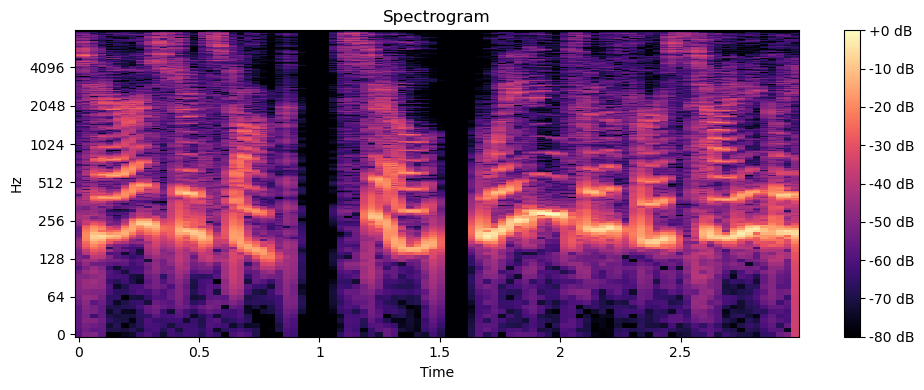

In [17]:
plot_spectrogram_audio(stimuli_path + '/' + wav_list_without_numb[0] + '_' + str(wav_files_without_numb[wav_list_without_numb[0]]) + '.wav', 0, 3)

In [43]:
meta = list()
for annot in raw.annotations:
    d = eval(annot.pop("description"))
    for k, v in annot.items():
        assert k not in d.keys()
        d[k] = v
    meta.append(d)
meta = pd.DataFrame(meta)
meta["intercept"] = 1.0

# meta=meta[(meta["kind"]=="word") & (meta["sound_id"]==1.0)] 
meta=meta[(meta["kind"]=="word")]  

events = np.c_[
    meta.onset * raw.info["sfreq"], np.ones((len(meta), 2))
].astype(int)

In [44]:
meta

,story,story_uid,sound_id,kind,start,sound,onset,duration,orig_time,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word,intercept
2,lw1,0.0,0.0,word,0.000000,stimuli/audio/lw1_0.wav,23.506,0.30,2000-01-01 00:00:00+00:00,NaN,0.0,sentence,0.0,205.0,Allison,1.0,Tara,1.0
7,lw1,0.0,0.0,word,0.310000,stimuli/audio/lw1_0.wav,23.816,0.24,2000-01-01 00:00:00+00:00,NaN,0.0,sentence,1.0,205.0,Allison,1.0,stood,1.0
12,lw1,0.0,0.0,word,0.550000,stimuli/audio/lw1_0.wav,24.056,0.37,2000-01-01 00:00:00+00:00,NaN,0.0,sentence,2.0,205.0,Allison,1.0,stock,1.0
17,lw1,0.0,0.0,word,1.080000,stimuli/audio/lw1_0.wav,24.586,0.40,2000-01-01 00:00:00+00:00,NaN,0.0,sentence,3.0,205.0,Allison,1.0,still,1.0
22,lw1,0.0,0.0,word,1.630000,stimuli/audio/lw1_0.wav,25.136,0.41,2000-01-01 00:00:00+00:00,NaN,0.0,sentence,4.0,205.0,Allison,1.0,waiting,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,lw1,0.0,3.0,word,50.070000,stimuli/audio/lw1_3.wav,361.097,0.17,2000-01-01 00:00:00+00:00,NaN,52.0,sentence,15.0,205.0,Allison,1.0,end,1.0
3113,lw1,0.0,3.0,word,50.250000,stimuli/audio/lw1_3.wav,361.277,0.14,2000-01-01 00:00:00+00:00,NaN,52.0,sentence,16.0,205.0,Allison,1.0,for,1.0
3116,lw1,0.0,3.0,word,50.460000,stimuli/audio/lw1_3.wav,361.487,0.58,2000-01-01 00:00:00+00:00,NaN,52.0,sentence,18.0,205.0,Allison,1.0,project,1.0
3124,lw1,0.0,3.0,word,51.179999,stimuli/audio/lw1_3.wav,362.207,0.15,2000-01-01 00:00:00+00:00,NaN,52.0,sentence,19.0,205.0,Allison,1.0,and,1.0


In [56]:
epochs = mne.Epochs(
    raw,
    events,
    tmin=-0.200,
    tmax=3,  # time_window scelta nostra
    decim=1,  # quanti punti definiscono la dimensione temporale 
    baseline=(-0.2, 0.0),
    metadata=meta,
    preload=True,
    event_repeated="drop",
)

# threshold
th = np.percentile(np.abs(epochs._data), 95)
epochs._data[:] = np.clip(epochs._data, -th, th)
epochs.apply_baseline()
th = np.percentile(np.abs(epochs._data), 95)
epochs._data[:] = np.clip(epochs._data, -th, th)
epochs.apply_baseline()

Adding metadata with 18 columns
668 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 668 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Number of events,668
Events,1: 668
Time range,-0.200 – 3.000 s
Baseline,-0.200 – 0.000 s


In [57]:
epochs[0].get_data().shape   # da questo prendo lo spettrogramma

(1, 256, 3201)

In [53]:
epochs[0]._metadata

,story,story_uid,sound_id,kind,start,sound,onset,duration,orig_time,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word,intercept
0,lw1,0.0,0.0,word,0.0,stimuli/audio/lw1_0.wav,23.506,0.3,2000-01-01 00:00:00+00:00,NaN,0.0,sentence,0.0,205.0,Allison,1.0,Tara,1.0


In [33]:
events, event_id = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events, event_id, event_repeated='merge')

Used Annotations descriptions: ["{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'phoneme', 'start': 0.0, 'sound': 'stimuli/audio/lw1_0.wav', 'phoneme': 't_B', 'sequence_id': 0.0, 'condition': 'sentence', 'word_index': 0.0, 'speech_rate': 205.0, 'voice': 'Allison', 'pronounced': 1.0}", "{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'phoneme', 'start': 0.08, 'sound': 'stimuli/audio/lw1_0.wav', 'phoneme': 'eh_I', 'sequence_id': 0.0, 'condition': 'sentence', 'word_index': 0.0, 'speech_rate': 205.0, 'voice': 'Allison', 'pronounced': 1.0}", "{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'phoneme', 'start': 0.17, 'sound': 'stimuli/audio/lw1_0.wav', 'phoneme': 'r_I', 'sequence_id': 0.0, 'condition': 'sentence', 'word_index': 0.0, 'speech_rate': 205.0, 'voice': 'Allison', 'pronounced': 1.0}", "{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'phoneme', 'start': 0.24, 'sound': 'stimuli/audio/lw1_0.wav', 'phoneme': 'ah_E', 'sequence_id': 0.0, 'c

In [35]:
events.shape

(3134, 3)

In [ ]:
epochs

Magnetometers

In [90]:
#events, event_id = mne.events_from_annotations(raw)
#epochs = mne.Epochs(raw, events, event_id, event_repeated='merge')

path_events = '/data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_events.tsv'
events_df = pd.read_csv(path_events, sep='\t')
sampling_freq = 1000  
events_df['onset_samples'] = (events_df['onset'] * sampling_freq).astype(int)
events = np.column_stack([
    events_df['onset_samples'].values,
    np.zeros(len(events_df), dtype=int),
    events_df['trial_type'].factorize()[0] + 1  
])
event_id = {key: val for val, key in enumerate(np.unique(events_df['trial_type']), start=1)}
epochs = mne.Epochs(raw, events, event_id, event_repeated='drop')



Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
2465 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [92]:
events

array([[ 23506,      0,      1],
       [ 23506,      0,      2],
       [ 23506,      0,      3],
       ...,
       [363057,      0,   3132],
       [363137,      0,   3133],
       [363147,      0,   3134]])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


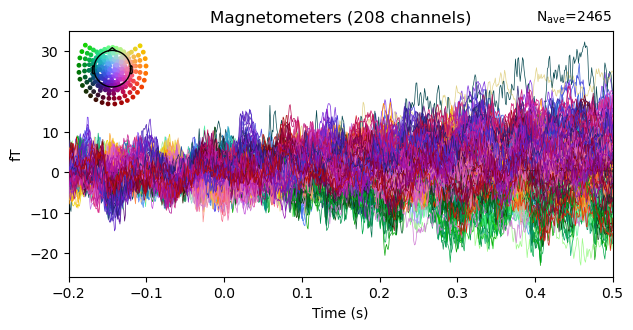

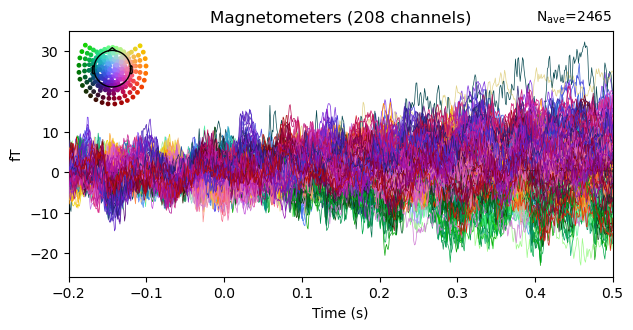

In [83]:
epochs.average().plot(picks='mag')